## 使用IMDB数据集

In [38]:
# 此处导入显示报错是因为mac下keras为动态加载库，不影响使用
# 至于为什么不用tensorflow.python.keras，因为官方不建议使用
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

## 将句子编码为整数，并转为索引：单词的形式

In [39]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])  # 取第一个句子

## 将句子转化为二进制矩阵，将对应索引的单词转化为1，其他为0

In [40]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## 标签向量化

In [41]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 构建模型

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 编译模型

In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 可以自定义优化器

In [44]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 创建训练集和验证集

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 训练模型

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
 1/30 [>.............................] - ETA: 10s - loss: 0.6933 - accuracy: 0.5137

2022-04-23 11:06:19.150456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.7909

2022-04-23 11:06:19.968400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 29ms/step - loss: 0.5129 - accuracy: 0.7918 - val_loss: 0.3809 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3042 - accuracy: 0.9054 - val_loss: 0.3276 - val_accuracy: 0.8708
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2261 - accuracy: 0.9271 - val_loss: 0.2880 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1784 - accuracy: 0.9429 - val_loss: 0.3170 - val_accuracy: 0.8721
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1462 - accuracy: 0.9531 - val_loss: 0.2787 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1207 - accuracy: 0.9631 - val_loss: 0.2946 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1006 - accuracy: 0.9704 - val_loss: 0.3060 - val_accuracy: 0.8842
Epoch 8/20
30/30 [======

## 查看模型训练结果

In [47]:
print(history.history)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 绘制训练损失和验证损失

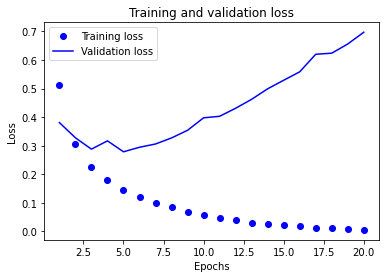

In [48]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 绘制训练精度和验证精度

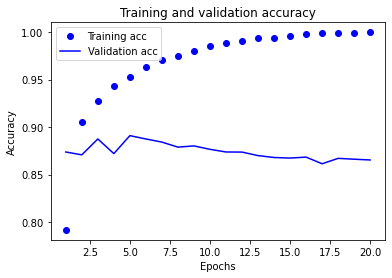

In [49]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 重新编译、训练模型

In [52]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 18s - loss: 0.6925 - accuracy: 0.5215

2022-04-23 11:12:12.377188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 11ms/step - loss: 0.4404 - accuracy: 0.8320
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2570 - accuracy: 0.9113
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2007 - accuracy: 0.9289
Epoch 4/4
 19/782 [..............................] - ETA: 4s - loss: 0.2856 - accuracy: 0.8865

2022-04-23 11:12:15.834473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 5ms/step - loss: 0.2938 - accuracy: 0.8833


[0.2938489019870758, 0.8832800388336182]